<h2 id='part4'> How can you  generate higher ratings? </h2>


To answer this question I will use listing data to model and predict the ratings that would be generated by a given Seattle AirBnb listing, 

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
% config InlineBachend.figure_format = 'retina'

In [2]:
Listings_data = pd.read_csv('listings.csv')
### Data shape
Listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
### Data shape
Listings_data.shape

(3818, 92)

In [4]:
## Alook at the variable
Listings_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

## Variables classification

After a quick look at the variables of our dataset we can classif them into 5 categories:
   - DESCRIPTIONS : name, summary, space, description.
   
   - HOST : host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost.
   
   - HOME DETAILS : property_type, room_type, accomodates, bathrooms, bedrooms, beds, bed_type, amenities.
   
   - LISTING ELEMENTS : price, cleaning_fee, extra_people, minimum_nights, maximum_nights, instant_bookable, cancellation policy.
   
   - SCORES : review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value
   

In [5]:
list_var = ['name', 'summary', 'space', 'description', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
            'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type','amenities', 
            'price', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable', 'cancellation_policy', 'review_scores_rating', 
            'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value']
### get a subset of data
df = Listings_data[list_var]
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
name                            3818 non-null object
summary                         3641 non-null object
space                           3249 non-null object
description                     3818 non-null object
host_response_time              3295 non-null object
host_response_rate              3295 non-null object
host_acceptance_rate            3045 non-null object
host_is_superhost               3816 non-null object
neighbourhood_group_cleansed    3818 non-null object
property_type                   3817 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null int64
bathrooms                       3802 non-null float64
bedrooms                        3812 non-null float64
beds                            3817 non-null float64
bed_type                        3818 non-null object
amenities                       3818 non-nu

In [6]:
### look at the 10 first variable
df.iloc[:5, 0:10]

,name,summary,space,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,within a few hours,96%,100%,f,Queen Anne,Apartment
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,within an hour,98%,100%,t,Queen Anne,Apartment
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,within a few hours,67%,100%,f,Queen Anne,House
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,f,Queen Anne,Apartment
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,within an hour,100%,NaN,f,Queen Anne,House


In [7]:
### look at the 12 second variable
df.iloc[:5, 10:22]

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,minimum_nights,maximum_nights,instant_bookable
0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,1,365,f
1,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,$40.00,2,90,f
2,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,$300.00,4,30,f
3,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,NaN,1,1125,f
4,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,$125.00,1,1125,f


In [8]:
### look at the rest of variable
df.iloc[:5, 22:]

,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,moderate,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,strict,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,strict,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,strict,92.0,9.0,9.0,10.0,10.0,9.0,9.0


## Cleaning data

In [9]:
# Get lengths of description elements
df['name_length'] = df['name'].str.len()
df['summary_length'] = df['summary'].str.len()
df['space_length'] = df['space'].str.len()
df['description_length'] = df['description'].str.len()
df['amenities_length'] = df['amenities'].str.len()
## full nan values by 0
df['name_length'].fillna(0, inplace=True)
df['summary_length'].fillna(0, inplace=True)
df['space_length'].fillna(0, inplace=True)
df['description_length'].fillna(0, inplace=True)
df['amenities_length'].fillna(0, inplace=True)
### drop original variable
df = df.drop(['name', 'summary', 'space', 'description', 'amenities'], axis=1)
df.head()

/home/eddadsi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/eddadsi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/eddadsi/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,name_length,summary_length,space_length,description_length,amenities_length
0,within a few hours,96%,100%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,9.0,10.0,28,0.0,1000.0,1000,114
1,within an hour,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,34,249.0,1000.0,1000,243
2,within a few hours,67%,100%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,10.0,10.0,10.0,10.0,10.0,35,241.0,1000.0,1000,291
3,NaN,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,18,243.0,0.0,243,197
4,within an hour,100%,NaN,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,9.0,10.0,10.0,9.0,9.0,30,184.0,488.0,1000,181


In [10]:
# Recode host_response_time
### value count in host_response_time variable
df['host_response_time'].value_counts(dropna=False)

within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64

In [11]:
# Convert host_response_time to integers
df['host_response_time'].replace('within an hour', 1, inplace=True)
df['host_response_time'].replace('within a few hours', 2, inplace=True)
df['host_response_time'].replace('within a day', 3, inplace=True)
df['host_response_time'].replace('a few days or more', 4, inplace=True)
# Impute missing values using forward-fill method
df['host_response_time'].fillna(method='ffill', inplace=True)

In [12]:
# Convert host_response_rate and host_acceptance_rate to number between 0 and 1
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('%','',regex=True).astype('float64')/100.00
df['host_response_rate'] = df['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00
# Impute missing values using forward-fill method
df['host_response_rate'].fillna(method='ffill', inplace=True)
df['host_acceptance_rate'].fillna(method='ffill', inplace=True)

In [13]:
## host_is_superhost variable
df['host_is_superhost'].value_counts(dropna=False)

f      3038
t       778
NaN       2
Name: host_is_superhost, dtype: int64

In [14]:
# Change f/t values to binary 0/1
df['host_is_superhost'].replace('t',1, inplace=True)
df['host_is_superhost'].replace('f',0, inplace=True)
df['instant_bookable'].replace('t',1, inplace=True)
df['instant_bookable'].replace('f',0, inplace=True)
# Impute missing values by mode value
df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0], inplace=True)

In [15]:
# clean property_type variable
df['property_type'].value_counts(dropna=False)

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
NaN                   1
Name: property_type, dtype: int64

In [16]:
def recode_property_type(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

df['property_type'] = df['property_type'].apply(recode_property_type)

In [17]:
# Clean bed_type 
df['bed_type'].value_counts(dropna=False)

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [18]:
## recode bed_type to binary real bed or other
def recode_bed_type(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

df['bed_type'] = df['bed_type'].apply(recode_bed_type)

In [19]:
# Convert cleaning_fee and price from strings to numbers
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype('float64')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '').astype('float64')

In [20]:
# Impute missing values
df['cleaning_fee'].fillna(0, inplace=True)
df['bathrooms'].fillna(method='ffill', inplace=True)
df['bedrooms'].fillna(method='ffill', inplace=True)
df['beds'].fillna(method='ffill', inplace=True)
df['host_is_superhost'].fillna(method='ffill', inplace=True)

In [21]:
## drop row without outcome
df = df[df['review_scores_rating'].isnull() == 0]

In [22]:
## look at our data
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 30 columns):
host_response_time              3171 non-null float64
host_response_rate              3171 non-null float64
host_acceptance_rate            3171 non-null float64
host_is_superhost               3171 non-null float64
neighbourhood_group_cleansed    3171 non-null object
property_type                   3171 non-null object
room_type                       3171 non-null object
accommodates                    3171 non-null int64
bathrooms                       3171 non-null float64
bedrooms                        3171 non-null float64
beds                            3171 non-null float64
bed_type                        3171 non-null object
price                           3171 non-null float64
cleaning_fee                    3171 non-null float64
minimum_nights                  3171 non-null int64
maximum_nights                  3171 non-null int64
instant_bookable                3171 no

In [23]:
## Distributions of numeric variable
# select numeric variable
df_num = df.select_dtypes(exclude=['object'])
df_num = df_num.dropna(axis=0, how='any')
df_num.shape

(3158, 25)

/home/eddadsi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eddadsi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eddadsi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eddadsi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eddadsi/anaconda3/lib/pyth

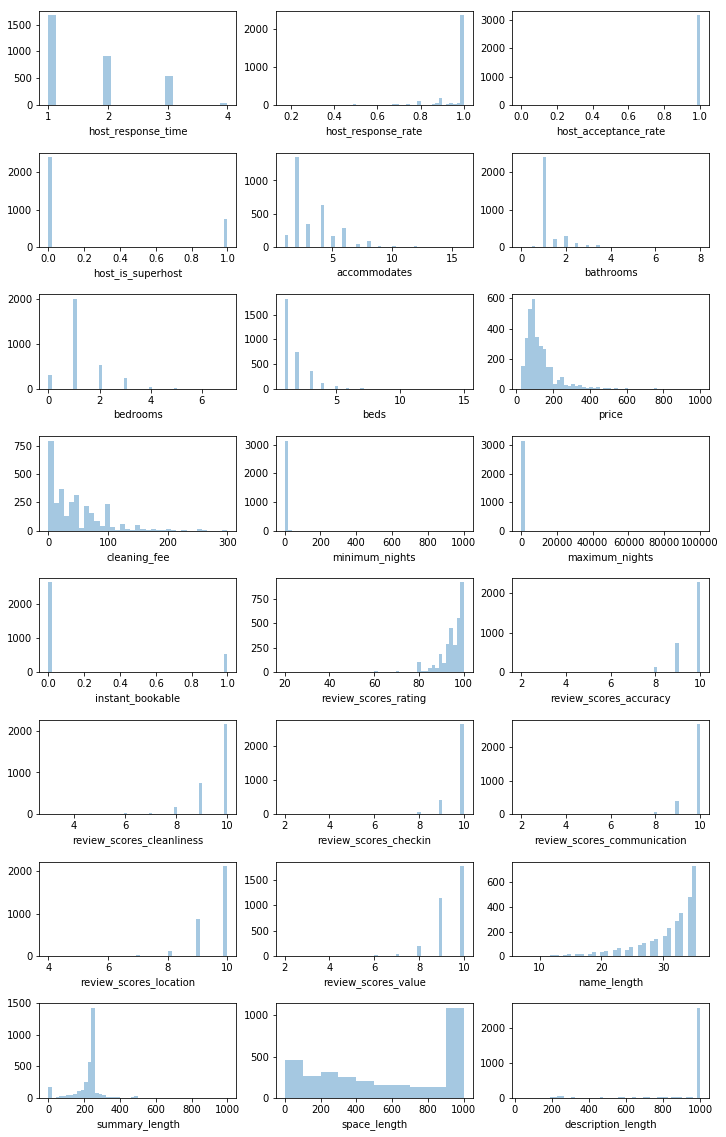

In [24]:
df_num_variables = list(df_num)

#Set the number of graphs in the facet chart
graphs = len(df_num_variables)-1

#create a list of positions for the chart
position = []
for i in range(8):
    for j in range(3):
        b = i,j
        position.append(b)

#Create base of subplot chart.. rows x columbs = graphs
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

#Fill in base with graphs based off of position
for i in range(graphs):
    sns.distplot(df_num[df_num_variables[i]], ax=axes[position[i]], kde=False)

In [25]:
#look  at Correlation between variables  
corr = df.corr()
## review_scores_rating corr
corr['review_scores_rating'].sort_values(ascending=False)

review_scores_rating           1.000000
review_scores_value            0.696534
review_scores_cleanliness      0.642882
review_scores_accuracy         0.621257
review_scores_communication    0.540620
review_scores_checkin          0.521813
review_scores_location         0.368423
host_is_superhost              0.240895
amenities_length               0.156362
host_response_rate             0.130394
summary_length                 0.065434
price                          0.055551
description_length             0.048678
bathrooms                      0.044645
bedrooms                       0.024235
instant_bookable               0.006071
minimum_nights                 0.001392
beds                          -0.000720
cleaning_fee                  -0.004638
name_length                   -0.007339
accommodates                  -0.013101
host_acceptance_rate          -0.014684
space_length                  -0.021034
maximum_nights                -0.031313
host_response_time            -0.097097


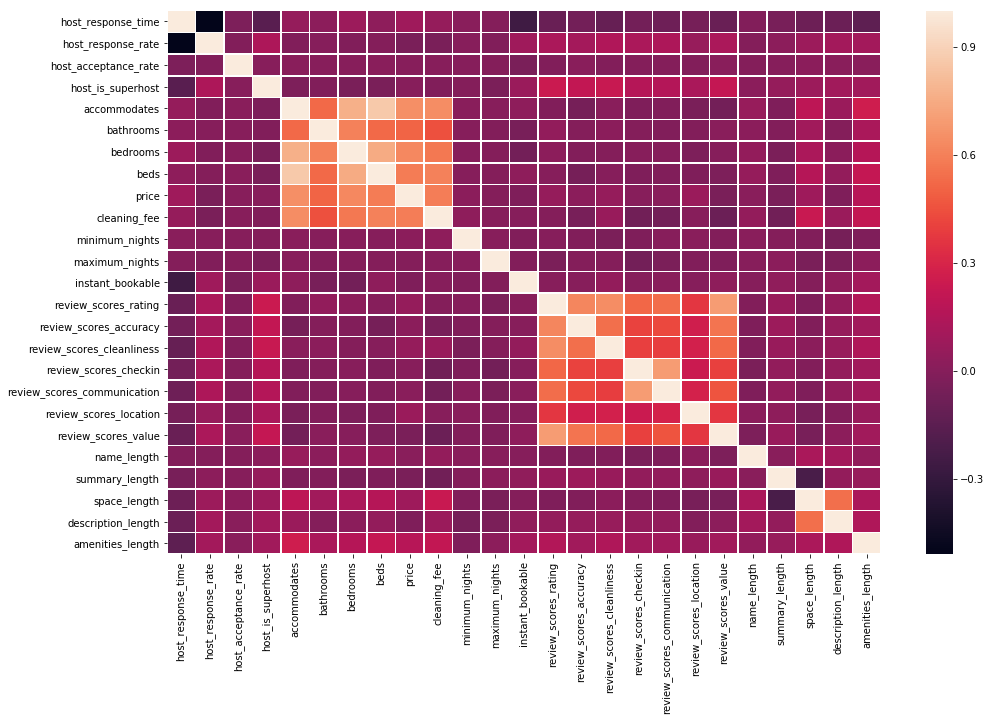

In [26]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,10))
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, ax=ax)

## back

Oh man, a lot of junk. Obviously the ratings subscore tend to correlate with the overall rating, but beyond that, biggest correlates so far with review_score_rating appear to be:

    host_is_superhost (duh)
    amenities_length
    host_response_rate

Other stuff:

    Location ratings doesn't really seem to factor into the overall rating... interesting
    Price/Cleaning fee look like they're greatly influenced by size elements (beds, guests, etc.)



In [40]:
#Remove all ratings except overall review_scores_rating outcome
df_model = df.loc[:,('host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights',
 'instant_bookable',
 'cancellation_policy',
 'review_scores_rating',
 'name_length',
 'summary_length',
 'space_length',
 'description_length',
 'amenities_length')]

In [41]:
### looking to the range of numerical variable
df_model.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,review_scores_rating,name_length,summary_length,space_length,description_length,amenities_length
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,1.661936,0.952135,0.999685,0.236834,3.384421,1.258278,1.303059,1.742353,126.802586,46.357616,2.395774,753.925576,0.170293,94.539262,30.666982,223.163671,565.145380,910.025859,201.462630
std,0.794221,0.113791,0.017758,0.425207,1.991495,0.593463,0.874410,1.154951,90.007172,49.580513,17.850468,1836.189972,0.375950,6.606083,5.000641,80.636162,377.050595,220.666134,69.136828
min,1.000000,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,20.000000,7.000000,0.000000,0.000000,34.000000,2.000000
25%,1.000000,0.990000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,75.000000,6.500000,1.000000,31.000000,0.000000,93.000000,29.000000,215.000000,221.500000,1000.000000,155.000000
50%,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,100.000000,35.000000,2.000000,1125.000000,0.000000,96.000000,32.000000,242.000000,549.000000,1000.000000,199.000000
75%,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,2.000000,2.000000,150.000000,70.000000,2.000000,1125.000000,0.000000,99.000000,34.000000,249.000000,1000.000000,1000.000000,246.000000
max,4.000000,1.000000,1.000000,1.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,300.000000,1000.000000,100000.000000,1.000000,100.000000,36.000000,1000.000000,1000.000000,1000.000000,446.000000


 From the tabale above it is clear that somme variables have huge range. Therfore I will Standardize features in order to get the same range for all features.

In [42]:
##
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = list(df_model.describe().columns)
df_model[numerical] = scaler.fit_transform(df_model[numerical])

/home/eddadsi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
df_model.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,review_scores_rating,name_length,summary_length,space_length,description_length,amenities_length
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,0.220645,0.942331,0.999685,0.236834,0.158961,0.157285,0.186151,0.053025,0.107160,0.154525,0.001397,0.007529,0.170293,0.931741,0.816103,0.223164,0.565145,0.906859,0.449240
std,0.264740,0.137098,0.017758,0.425207,0.132766,0.074183,0.124916,0.082497,0.092032,0.165268,0.017868,0.018362,0.375950,0.082576,0.172436,0.080636,0.377051,0.228433,0.155714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.987952,1.000000,0.000000,0.066667,0.125000,0.142857,0.000000,0.054192,0.021667,0.000000,0.000300,0.000000,0.912500,0.758621,0.215000,0.221500,1.000000,0.344595
50%,0.000000,1.000000,1.000000,0.000000,0.133333,0.125000,0.142857,0.000000,0.079755,0.116667,0.001001,0.011240,0.000000,0.950000,0.862069,0.242000,0.549000,1.000000,0.443694
75%,0.333333,1.000000,1.000000,0.000000,0.200000,0.125000,0.285714,0.071429,0.130879,0.233333,0.001001,0.011240,0.000000,0.987500,0.931034,0.249000,1.000000,1.000000,0.549550
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#Convert categorical fields to dummy variables
df_model = pd.get_dummies(df_model, columns=['neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'])

In [45]:
df_model.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Other,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0.333333,0.951807,1.0,0.0,0.200000,0.1250,0.142857,0.000000,0.064417,0.000000,...,0,0,1,0,0,0,1,0,1,0
1,0.000000,0.975904,1.0,1.0,0.200000,0.1250,0.142857,0.000000,0.130879,0.133333,...,0,0,1,0,0,0,1,0,0,1
2,0.333333,0.602410,1.0,0.0,0.666667,0.5625,0.714286,0.428571,0.974438,1.000000,...,1,0,1,0,0,0,1,0,0,1
4,0.000000,1.000000,1.0,0.0,0.333333,0.2500,0.428571,0.142857,0.437628,0.416667,...,1,0,1,0,0,0,1,0,0,1
5,0.000000,1.000000,1.0,0.0,0.066667,0.1250,0.142857,0.000000,0.100204,0.133333,...,1,0,0,1,0,0,1,0,0,1


# Moodling The Data

In [47]:
### split data features and  labels
review_score = df_model['review_scores_rating']
##
features_final = df_model.drop(['review_scores_rating'], axis=1)

Split the data into training and test sets. 80% of the data will be used for training and 20% for testing.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    review_score, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2536 samples.
Testing set has 635 samples.


###  Supervised Learning Models
**The following are some of the supervised learning models  for regression problem that I will test on the data

- LinearRegression
- DECISION TREE
- Random Forest